In [ ]:
!pip install ultralytics torch torchvision opencv-python numpy tqdm
!nvidia-smi
# First install the required package (run this once)
!pip install pycocotools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

# **MODEL YOLOV8 COCO**

In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to your zip file in Google Drive
zip_path = '/content/drive/MyDrive/no_leakage_dataset.zip'

# Destination path in Colab
extract_path = '/content/no_leakage_dataset'

# Check if file exists
if not os.path.exists(zip_path):
    raise FileNotFoundError(f"Zip file not found at {zip_path}. Please check the path.")

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted successfully to {extract_path}")

# List the extracted files
extracted_files = os.listdir(extract_path)
print("Extracted files/folders:")
for file in extracted_files:
    print(file)

Mounted at /content/drive
Files extracted successfully to /content/no_leakage_dataset
Extracted files/folders:
data.yaml
README.roboflow.txt
test
valid


In [ ]:
from ultralytics import YOLO
import os
from PIL import Image

# Define filtered class IDs
class_names = ["person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat"]
target_class_ids = [1, 2, 8]  # bicycle, car, boat

# Create the dataset.yaml file
yaml_content = """
# Save this as dataset.yaml
path: /content/drive/MyDrive/no_leakage_dataset2
train: train/images  # required but unused
val: test/images
test: test/images

names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
"""

# Save dataset.yaml
yaml_path = "/content/drive/MyDrive/no_leakage_dataset2/dataset.yaml"
os.makedirs(os.path.dirname(yaml_path), exist_ok=True)
with open(yaml_path, "w") as f:
    f.write(yaml_content)

# Load the basic YOLOv8n COCO model
model = YOLO("yolov8n.pt")

# Run validation on test split using the pretrained COCO weights
metrics = model.val(data=yaml_path, split='test', conf=0.5, iou=0.5)

# Directory setup for predictions
test_images_dir = "/content/drive/MyDrive/no_leakage_dataset2/test/images"
output_dir = "/content/drive/MyDrive/no_leakage_dataset2/test/predictions"
os.makedirs(output_dir, exist_ok=True)

ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
!pip install --force-reinstall torch torchvision torchaudio
!pip install ultralytics

  Using cached torch-2.7.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (29 kB)
  Using cached torchvision-0.22.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached torchaudio-2.7.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (6.6 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached typing_extensions-4.14.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.6.77-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.6.77-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.6.80-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.6 kB)
  Usin



# **MODEL B1,B2\**

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

from ultralytics import YOLO
import cv2
import os
import pandas as pd

# --- Settings ---
CONF_THRESHOLD = 0.3  # Confidence threshold for all operations
MIN_DETECTIONS = 1    # For the final CSV, skip images with no high-confidence detections

# --- Paths ---
MODEL_PATH = '/content/drive/MyDrive/no_leakage_dataset2/model_b2.pt'
DATA_YAML_PATH = '/content/drive/MyDrive/no_leakage_dataset2/data.yaml' # Must have a 'test:' path
test_images_path = '/content/drive/MyDrive/no_leakage_dataset2/test/images/'
test_labels_path = '/content/drive/MyDrive/no_leakage_dataset2/test/labels/' # Needed for FP check

# --- Output Directories ---
output_dir = '/content/drive/MyDrive/no_leakage_dataset2/high_confidence_results/'
fp_output_dir = '/content/drive/MyDrive/no_leakage_dataset2/false_positives/'
os.makedirs(output_dir, exist_ok=True)
os.makedirs(fp_output_dir, exist_ok=True)


# --- Load the Model ---
model = YOLO(MODEL_PATH)


# --- PART 1: Calculate Metrics on the TEST Set ---
print("--- PART 1: Running evaluation on the TEST set... ---")
# The split='test' argument ensures we use the test set defined in the YAML file.
metrics = model.val(data=DATA_YAML_PATH, conf=CONF_THRESHOLD, split='test')

print("\n--- Overall Performance Metrics (from TEST set) ---")
print(f"mAP50-95 (Box): {metrics.box.map:.4f}")
print(f"   mAP50 (Box): {metrics.box.map50:.4f}")
print(f"   mAP75 (Box): {metrics.box.map75:.4f}")

# Safely print per-class metrics
if metrics.box.p.size > 0:
    results_df = pd.DataFrame({
        'Class': [model.names[int(cls)] for cls in metrics.box.ap_class_index],
        'Precision': metrics.box.p, 'Recall': metrics.box.r,
        'mAP50': metrics.box.ap50, 'mAP50-95': metrics.box.ap
    })
    print("\n--- Per-Class Metrics (from TEST set) ---")
    print(results_df)
else:
    print("\n--- No objects detected during evaluation. Per-class metrics are not available. ---")


# --- PART 2: Find and Save False Positives (Detections in Background) ---
print("\n--- PART 2: Searching for False Positives in the TEST set... ---")
fp_count = 0
for img_name in os.listdir(test_images_path):
    if not img_name.lower().endswith(('.jpg', '.png', '.jpeg')):
        continue

    label_name = os.path.splitext(img_name)[0] + '.txt'
    label_path = os.path.join(test_labels_path, label_name)
    has_ground_truth = os.path.exists(label_path) and os.path.getsize(label_path) > 0

    if not has_ground_truth:
        img_path = os.path.join(test_images_path, img_name)
        results = model(img_path, conf=CONF_THRESHOLD)
        if len(results[0].boxes) > 0:
            fp_count += 1
            annotated_img = results[0].plot()
            cv2.imwrite(os.path.join(fp_output_dir, f"FP_{img_name}"), annotated_img)

print(f"-> Finished. Found and saved {fp_count} images with likely False Positives.")


# --- PART 3: Save ALL High-Confidence Detections from the TEST Set ---
print("\n--- PART 3: Saving all high-confidence detections to CSV and images... ---")
df = pd.DataFrame(columns=["image_name", "class_id", "class_name", "confidence", "x1", "y1", "x2", "y2"])

for img_name in os.listdir(test_images_path):
    if not img_name.lower().endswith(('.jpg', '.png', '.jpeg')):
        continue

    img_path = os.path.join(test_images_path, img_name)
    results = model(img_path, conf=CONF_THRESHOLD)

    if len(results[0].boxes) < MIN_DETECTIONS:
        continue

    annotated_img = results[0].plot()
    cv2.imwrite(os.path.join(output_dir, f"annotated_{img_name}"), annotated_img)

    for det in results[0].boxes:
        x1, y1, x2, y2 = det.xyxy[0].cpu().numpy()
        conf = det.conf.item()
        cls = int(det.cls.item())
        cls_name = model.names[cls]
        df.loc[len(df)] = [img_name, cls, cls_name, conf, x1, y1, x2, y2]

results_csv = os.path.join(output_dir, "high_confidence_detections.csv")
df.to_csv(results_csv, index=False)
print(f"-> Finished. Saved {len(df)} total detections to: {results_csv}")


--- PART 1: Running evaluation on the TEST set... ---
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 1.1±0.2 ms, read: 14.3±7.5 MB/s, size: 22.5 KB)


val: Scanning /content/drive/MyDrive/no_leakage_dataset2/test/labels.cache... 406 images, 151 backgrounds, 0 corrupt: 100%|██████████| 406/406 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:24<00:00,  3.24s/it]


                   all        406        440      0.536      0.289      0.421      0.299
               bicycle        200        253       0.71      0.368      0.538      0.333
                  boat         23         35        0.2     0.0571      0.132     0.0954
                   car         55        152      0.698      0.441      0.592      0.467
Speed: 4.1ms preprocess, 193.7ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val6

--- Overall Performance Metrics (from TEST set) ---
mAP50-95 (Box): 0.2986
   mAP50 (Box): 0.4207
   mAP75 (Box): 0.3167

--- Per-Class Metrics (from TEST set) ---
     Class  Precision    Recall     mAP50  mAP50-95
0  bicycle   0.709924  0.367589  0.538117  0.333425
1     boat   0.200000  0.057143  0.131712  0.095427
2      car   0.697917  0.440789  0.592230  0.467027

--- PART 2: Searching for False Positives in the TEST set... ---

image 1/1 /content/drive/MyDrive/no_leakage_dataset2/test/images/WEEKNUMMER672-HRE0001

# **MODEL A1 and A2**

100%|██████████| 406/406 [00:05<00:00, 67.68it/s]


Milder CLAHE processed images saved to: /content/clahe_test_images_mild
Original (Grayscale) vs Milder CLAHE Processed


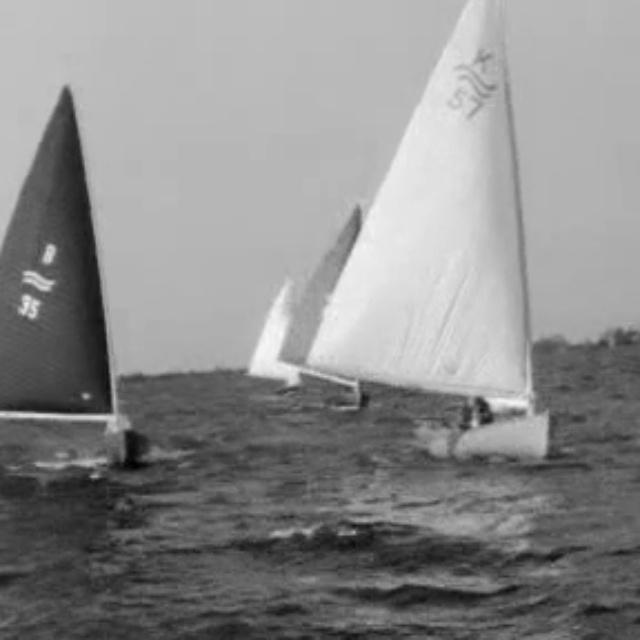

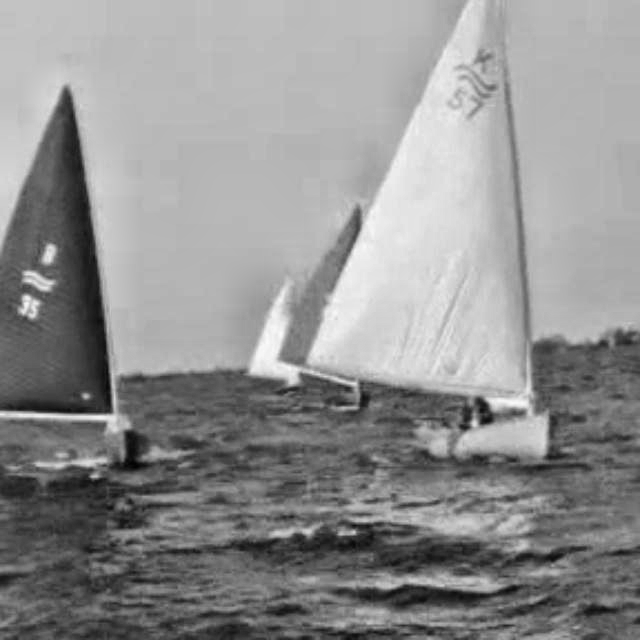

In [ ]:
import cv2
import os
import numpy as np
from tqdm import tqdm  # Progress bar
from google.colab.patches import cv2_imshow  # For displaying images in Colab

def apply_clahe(image, clip_limit=2.0, tile_grid_size=(8,8)):
    """Applies CLAHE to an image."""
    if len(image.shape) == 3:  # Convert to grayscale if RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    return clahe.apply(image)

# Input: Your test images in Google Drive
input_path = "/content/drive/MyDrive/no_leakage_dataset2/test/images"  # Adjust path if needed

# Output: New folder in Colab's content
output_path = "/content/clahe_test_images"
os.makedirs(output_path, exist_ok=True)  # Create folder if it doesn't exist

for filename in tqdm(os.listdir(input_path)):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
        # Read image
        img_path = os.path.join(input_path, filename)
        img = cv2.imread(img_path)

        # Apply CLAHE
        clahe_img = apply_clahe(img)

        # Save to output folder
        output_img_path = os.path.join(output_path, filename)
        cv2.imwrite(output_img_path, clahe_img)

print(f"CLAHE processed images saved to: {output_path}")

# Display a sample before/after
sample_img = cv2.imread(os.path.join(input_path, os.listdir(input_path)[0]))
clahe_sample = apply_clahe(sample_img)

print("Original (Grayscale) vs CLAHE Processed")
cv2_imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2GRAY))
cv2_imshow(clahe_sample)

In [ ]:
!zip -r /content/clahe_test_images.zip /content/clahe_test_images

from google.colab import files
files.download("/content/clahe_test_images.zip")

  adding: content/clahe_test_images/ (stored 0%)
  adding: content/clahe_test_images/WEEKNUMMER584-HRE0000E904_181000_321000_frame_000351_jpg.rf.9b1a936af3ea0963d4a83791178d2692.jpg (deflated 4%)
  adding: content/clahe_test_images/WEEKNUMMER584-HRE0000E904_181000_321000_frame_000239_jpg.rf.b36c73485d48e59c4f475cd3604eab80.jpg (deflated 3%)
  adding: content/clahe_test_images/WEEKNUMMER584-HRE0000E904_181000_321000_frame_000212_jpg.rf.51f427ae370c3023973da5b61ffdaf54.jpg (deflated 2%)
  adding: content/clahe_test_images/WEEKNUMMER672-HRE00015290_3254000_3492000_frame_000109_jpg.rf.22b60acd63f689bc4a1f53004dc1779b.jpg (deflated 4%)
  adding: content/clahe_test_images/WEEKNUMMER672-HRE00015290_3254000_3492000_frame_000086_jpg.rf.09b1bd3dc75a544d01d8f6dd3a05deba.jpg (deflated 3%)
  adding: content/clahe_test_images/WEEKNUMMER584-HRE0000E904_181000_321000_frame_000227_jpg.rf.e61dfe34d6e938c708c1d53033dc1027.jpg (deflated 3%)
  adding: content/clahe_test_images/WEEKNUMMER584-HRE0000E904_181

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Paths to your model and dataset
model_path = '/content/drive/MyDrive/no_leakage_dataset2/model_c2_best.pt'
dataset_path = '/content/clahe_test_images_mild'  # Your CLAHE processed images
original_labels_path = '/content/drive/MyDrive/no_leakage_dataset2/test/labels'  # Original labels

# Create a temporary data.yaml file for evaluation
temp_yaml_content = f"""
# Train/val/test sets
train: /content/drive/MyDrive/no_leakage_dataset2/train/images  # Dummy path, not actually used
val: /content/drive/MyDrive/no_leakage_dataset2/valid/images    # Dummy path, not actually used
test: /content/drive/MyDrive/no_leakage_dataset2/test/images  # test images path

# Classes
names:
  0: no_leakage
  1: leakage
"""

# Save the temporary data.yaml
temp_yaml_path = '/content/temp_data.yaml'
with open(temp_yaml_path, 'w') as f:
    f.write(temp_yaml_content)

# Load your custom trained model
model = YOLO(model_path)

# Test the model on CPU
results = model.val(
    data=temp_yaml_path,  # Use our temporary YAML file
    split='test',  # Use test split
    imgsz=640,  # Image size
    batch=8,  # Batch size
    conf=0.25,  # Confidence threshold
    iou=0.45,  # IoU threshold
    device='cpu',  # Force CPU usage
    save_json=True,  # Optionally save results to JSON
    save_conf=True  # Optionally save confidence scores
)

# Print metrics
print(results)

# Optionally, you can clean up the temporary YAML file
os.remove(temp_yaml_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.3 ms, read: 14.3±3.1 MB/s, size: 31.8 KB)


val: Scanning /content/drive/MyDrive/no_leakage_dataset2/test/labels.cache... 406 images, 151 backgrounds, 0 corrupt: 100%|██████████| 406/406 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [01:24<00:00,  1.66s/it]


                   all        406        440      0.599      0.374      0.514      0.296
               bicycle        200        253      0.692      0.285        0.5      0.294
                  boat         23         35      0.538        0.2      0.361      0.162
                   car         55        152      0.567      0.638      0.682      0.432
Speed: 1.6ms preprocess, 195.9ms inference, 0.0ms loss, 0.3ms postprocess per image
Saving runs/detect/val11/predictions.json...
Results saved to runs/detect/val11
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d6d6d1e3110>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009

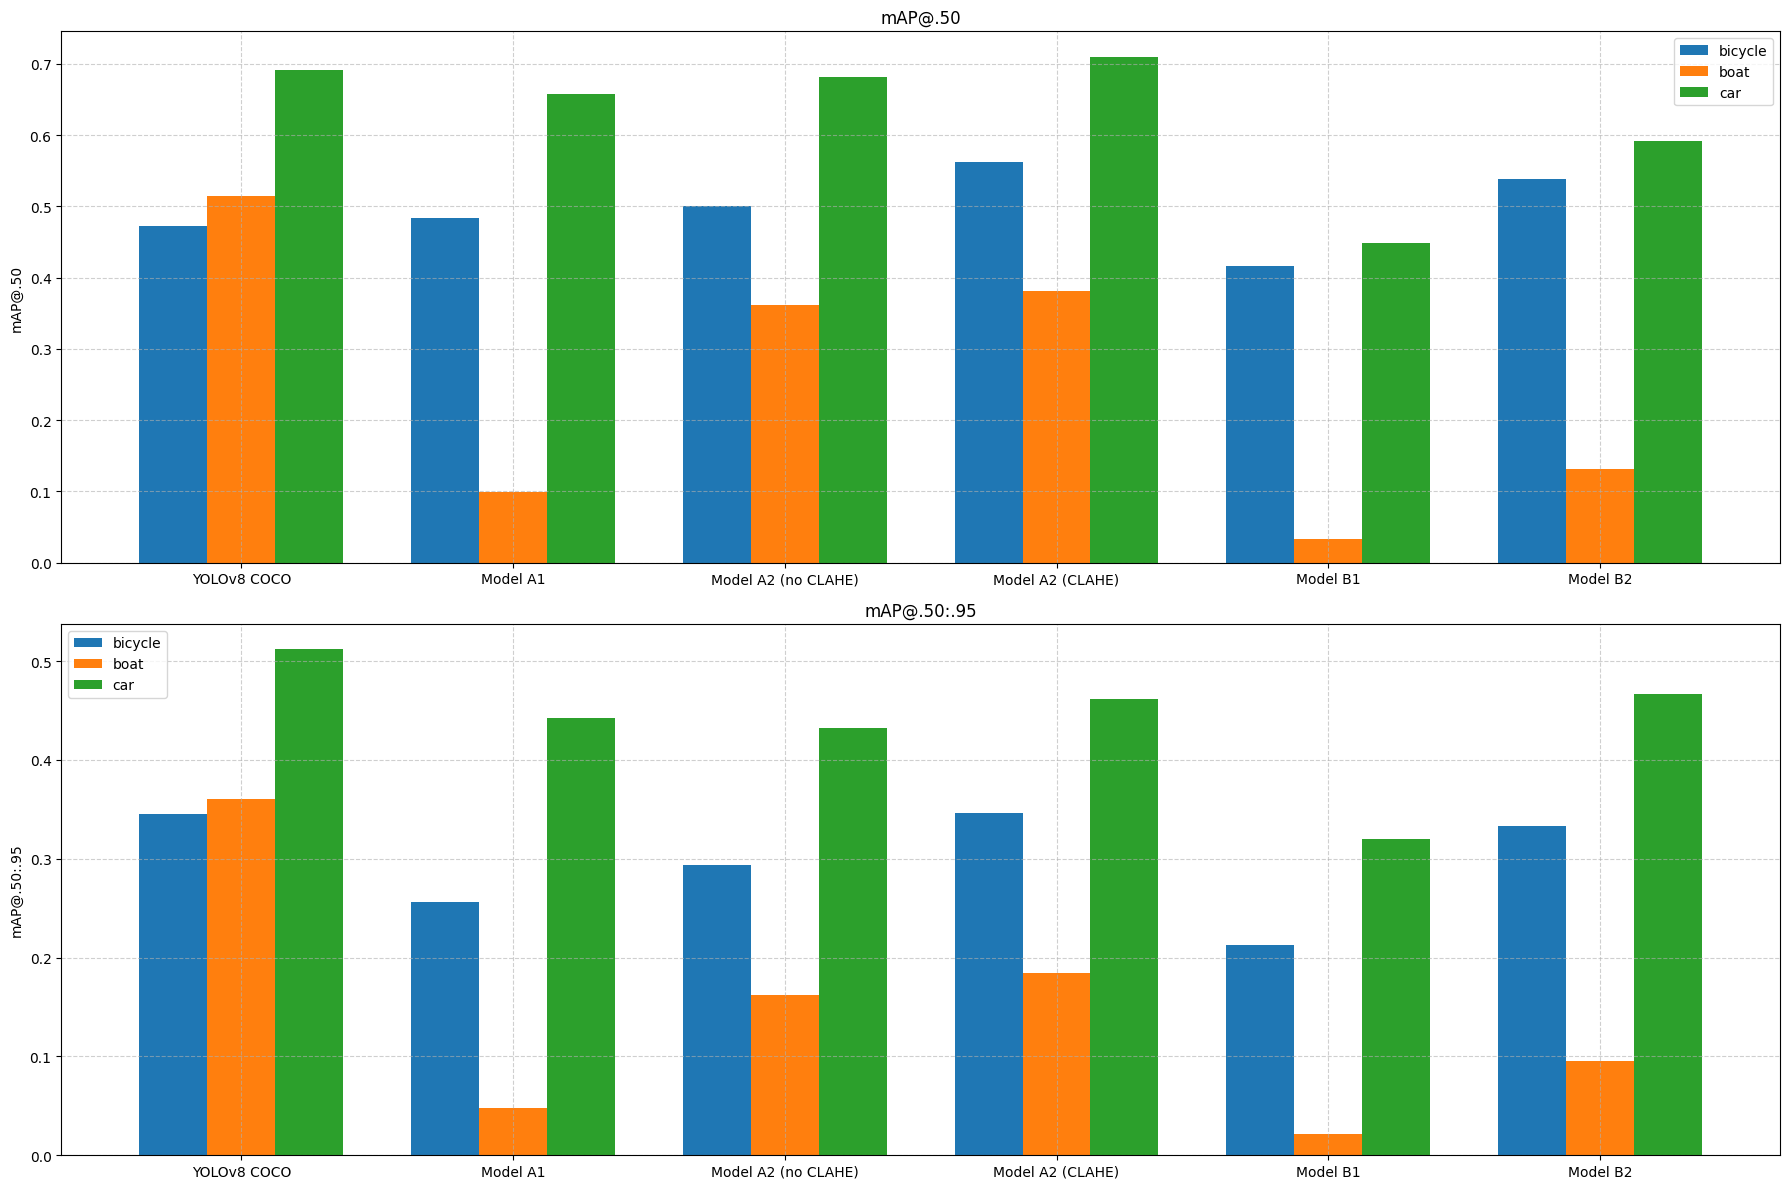

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the tables
models = ['YOLOv8 COCO', 'Model A1', 'Model A2 (no CLAHE)', 'Model A2 (CLAHE)', 'Model B1', 'Model B2']
classes = ['bicycle', 'boat', 'car']

# mAP@.50 data
map50_data = {
    'YOLOv8 COCO': [0.473, 0.514, 0.691],
    'Model A1': [0.483, 0.099, 0.657],
    'Model A2 (no CLAHE)': [0.500, 0.361, 0.682],
    'Model A2 (CLAHE)': [0.562, 0.381, 0.710],
    'Model B1': [0.417, 0.034, 0.448],
    'Model B2': [0.538, 0.132, 0.592]
}

# mAP@.50:.95 data
map50_95_data = {
    'YOLOv8 COCO': [0.345, 0.360, 0.512],
    'Model A1': [0.256, 0.048, 0.442],
    'Model A2 (no CLAHE)': [0.294, 0.162, 0.432],
    'Model A2 (CLAHE)': [0.346, 0.184, 0.462],
    'Model B1': [0.213, 0.022, 0.320],
    'Model B2': [0.333, 0.095, 0.467]
}

# Create figures
plt.figure(figsize=(18, 12))

# Plot mAP@.50 for all models
plt.subplot(2, 1, 1)
x = np.arange(len(models))
width = 0.25

for i, cls in enumerate(classes):
    cls_values = [map50_data[model][i] for model in models]
    plt.bar(x + i*width, cls_values, width, label=cls)

plt.ylabel('mAP@.50')
plt.title('mAP@.50')
plt.xticks(x + width, models)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Plot mAP@.50:.95 for all models
plt.subplot(2, 1, 2)
for i, cls in enumerate(classes):
    cls_values = [map50_95_data[model][i] for model in models]
    plt.bar(x + i*width, cls_values, width, label=cls)

plt.ylabel('mAP@.50:.95')
plt.title('mAP@.50:.95')
plt.xticks(x + width, models)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

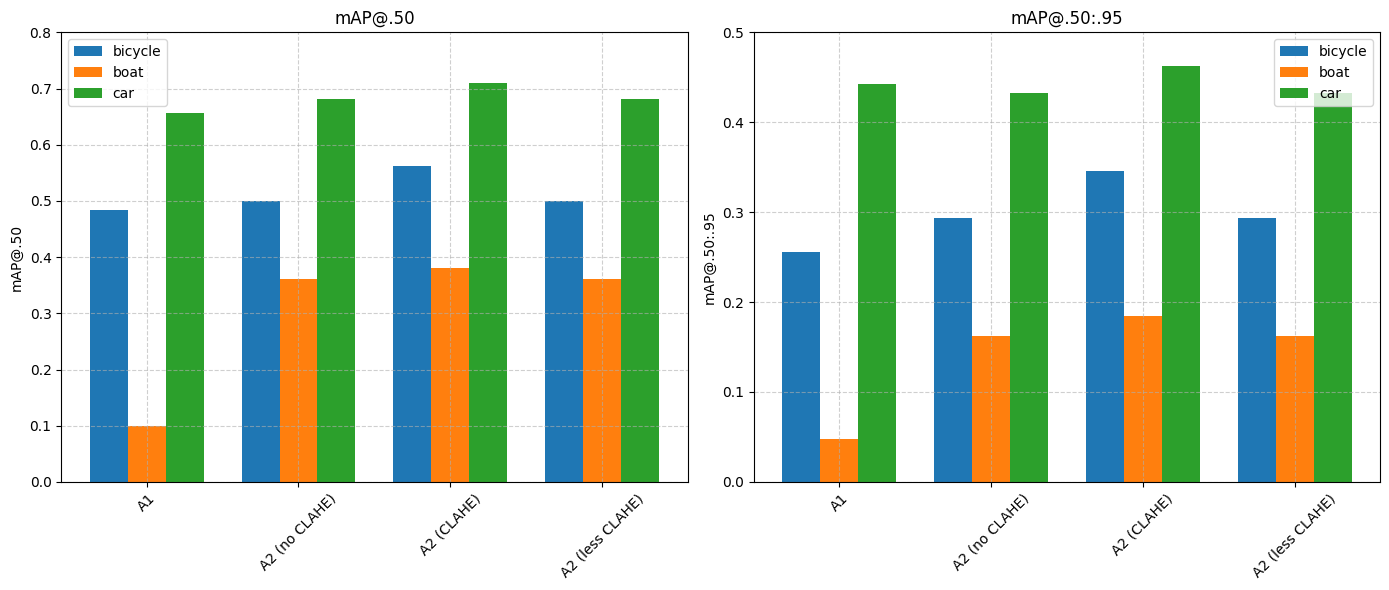

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Model Variant A
models = ['A1', 'A2 (no CLAHE)', 'A2 (CLAHE)', 'A2 (less CLAHE)']
classes = ['bicycle', 'boat', 'car']

# mAP@.50 data
map50_data = {
    'A1': [0.483, 0.099, 0.657],
    'A2 (no CLAHE)': [0.500, 0.361, 0.682],
    'A2 (CLAHE)': [0.562, 0.381, 0.710],
    'A2 (less CLAHE)': [0.500, 0.361, 0.682]  # Same as A2 no CLAHE per your table
}

# mAP@.50:.95 data
map50_95_data = {
    'A1': [0.256, 0.048, 0.442],
    'A2 (no CLAHE)': [0.294, 0.162, 0.432],
    'A2 (CLAHE)': [0.346, 0.184, 0.462],
    'A2 (less CLAHE)': [0.294, 0.162, 0.432]  # Same as A2 no CLAHE per your table
}

# Create figure
plt.figure(figsize=(14, 6))

# Plot mAP@.50
plt.subplot(1, 2, 1)
x = np.arange(len(models))
width = 0.25

for i, cls in enumerate(classes):
    cls_values = [map50_data[model][i] for model in models]
    plt.bar(x + i*width, cls_values, width, label=cls)

plt.title('mAP@.50')
plt.ylabel('mAP@.50')
plt.xticks(x + width, models, rotation=45)
plt.ylim(0, 0.8)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Plot mAP@.50:.95
plt.subplot(1, 2, 2)
for i, cls in enumerate(classes):
    cls_values = [map50_95_data[model][i] for model in models]
    plt.bar(x + i*width, cls_values, width, label=cls)

plt.title('mAP@.50:.95')
plt.ylabel('mAP@.50:.95')
plt.xticks(x + width, models, rotation=45)
plt.ylim(0, 0.5)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('model_a_comparison.pdf', bbox_inches='tight', dpi=300)
plt.show()